# Multiple Linear Regression 
It is similar to simple linear regression but the major difference being that we try to establish linear relationship between one response variable and more than one predictor variables. For example suppose that a researcher is studying that how the sales are affected by Price and Adspends. The response variable is Sales (Y) and the predictor variables are Price (X1)and Adspends(X2).



In [1]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# Creating data for this dataset
import numpy as np
X= [[150,100],[159,200],[170,350],[175,400],[179,500],[180,180],[189,159],[199,110],[199,400],[199,230],[235,120],[239,340],[239,360],[249,145],[249,400]]
Y= [0.73,1.39,2.03,1.45,1.82,1.32,0.83,0.53,1.95,1.27,0.49,1.03,1.24,0.55,1.3]


In [3]:
## Prepare the Dataset

import pandas as pd

df2=pd.DataFrame(X,columns=['Price','Adspends'])
df2['Sales']=pd.Series(Y)
df2.head()


,Price,Adspends,Sales
0,150,100,0.73
1,159,200,1.39
2,170,350,2.03
3,175,400,1.45
4,179,500,1.82


In [4]:
### Apply multiple Linear Regression using STATSMODEL

import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf


#ordinary least squares method
model=smf.ols(formula='Sales ~ Price + Adspends' , data=df2)
results_formula=model.fit()
results_formula.params


Intercept    1.633842
Price       -0.006379
Adspends     0.003161
dtype: float64

In [6]:
### Preparing data for visualization

x_surf, y_surf = np.meshgrid(np.linspace(df2.Price.min(), df2.Price.max(), 100),np.linspace(df2.Adspends.min(), df2.Adspends.max(), 100))
onlyX = pd.DataFrame({'Price': x_surf.ravel(), 'Adspends': y_surf.ravel()})
fittedY=results_formula.predict(exog=onlyX)

In [7]:
## convert the predicted result in an array
fittedY=np.array(fittedY)


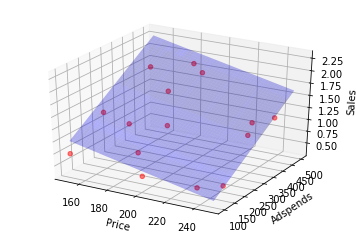

In [14]:
# Visualize the Data for Multiple Linear Regression
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2['Price'],df2['Adspends'],df2['Sales'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('Price')
ax.set_ylabel('Adspends')
ax.set_zlabel('Sales')
plt.show()